### 載入套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 讀取csv

In [2]:
df = pd.read_csv('attraction_info_final.csv', index_col=0)

### 查看原始資料空缺值

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 346
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   google_url              347 non-null    object 
 1   place_name              347 non-null    object 
 2   total_rating            347 non-null    float64
 3   place_category          347 non-null    object 
 4   total_reviews           347 non-null    float64
 5   cost                    48 non-null     object 
 6   address                 347 non-null    object 
 7   district                344 non-null    object 
 8   eat_in                  347 non-null    int64  
 9   to_go_1                 347 non-null    int64  
 10  to_go_2                 347 non-null    int64  
 11  delivery                347 non-null    int64  
 12  opening_hour            288 non-null    object 
 13  website                 294 non-null    object 
 14  phone                   273 non-null    ob

### 檢查資料是否重複

In [4]:
print('google_url是否重複: ',df['google_url'].duplicated().any())
print('店名+地址是否重複: ',df[['address', 'place_name']].duplicated().any())
print('file_name_1是否重複: ',df['file_name_1'].duplicated().any())

google_url是否重複:  False
店名+地址是否重複:  False
file_name_1是否重複:  False


### 新增行政區欄位

In [18]:
df["district_new"] = df["district"].str.split(" ").str.get(3)

In [22]:
# 刪除區
del_district = ['淡水區', '楊梅區', '三重區', '新店區', '北埔鄉', '七堵區', '桃園區', '板橋區', '永康區']
df2 = df[~df['district_new'].isin(del_district)]

### 新增緯經度欄位

In [30]:
df2['location'] = df2['google_url'].str.findall('\d?\d\d\.\d+')
df_expanded_v0 = df2["location"].apply(pd.Series)
df2['latitude'] = df_expanded_v0[0]
df2['longitude'] = df_expanded_v0[1]

C:\Users\student\AppData\Local\Temp\ipykernel_5108\2330474720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location'] = df2['google_url'].str.findall('\d?\d\d\.\d+')
C:\Users\student\AppData\Local\Temp\ipykernel_5108\2330474720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['latitude'] = df_expanded_v0[0]
C:\Users\student\AppData\Local\Temp\ipykernel_5108\2330474720.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [33]:
def open_time(weekday, str_weekday):
    for i in df2[str_weekday]:
        listt = []
        if len(i) == 0:
            listt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

        elif len(i) == 1:
            listt = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

        if len(i) > 1:
            # 晚上營業時間沒有跨日
            if int(i[-1]) - int(i[0]) > 0:
                listt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
                if len(i) >= 2:
                    listt[int(i[0]):int(i[1])] = np.ones(abs(int(i[1])-int(i[0])))

                    if len(i) >= 4:
                        listt[int(i[2]):int(i[3])] = np.ones(abs(int(i[3])-int(i[2])))

                        if len(i) >= 6:
                            listt[int(i[4]):int(i[5])] = np.ones(int(i[5])-int(i[4]))

                            if len(i) >= 8:
                                listt[int(i[6]):int(i[7])] = np.ones(int(i[7])-int(i[6]))

            # 晚上營業時間跨日    
            if int(i[-1]) - int(i[0]) < 0:
                listt = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

                if len(i) >= 2:
                    listt[int(i[-1]):int(i[0])] = np.zeros(abs(int(i[-1])-int(i[0])))

                    if len(i) >= 4:
                        listt[int(i[1]):int(i[2])] = np.zeros(abs(int(i[2])-int(i[2])))

                        if len(i) >= 6:
                            listt[int(i[3]):int(i[4])] = np.zeros(abs(int(i[4])-int(i[3])))

                            if len(i) >= 8:
                                listt[int(i[5]):int(i[6])] = np.zeros(abs(int(i[6])-int(i[5])))

        weekday.append(listt)

In [56]:
# 空值全部填補為24小時
fill = ['星期三、24小時營業',
 '星期四、24小時營業',
 '星期五、24小時營業',
 '星期六、24小時營業',
 '星期日、24小時營業',
 '星期一、24小時營業',
 '星期二、24小時營業.隱藏本週營業時間']
fill_index = df2[df2['week_list'].isna()]['week_list'].index
for i in fill_index:    
    df2.loc[i]['week_list'] = fill
# df2['week_list'][4]

C:\Users\student\AppData\Local\Temp\ipykernel_5108\2487009335.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[i]['week_list'] = fill


In [73]:
df2['week_list'].fillna(value=0, inplace=True)

C:\Users\student\AppData\Local\Temp\ipykernel_5108\3834109657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['week_list'].fillna(value=0, inplace=True)


In [75]:
df2

,google_url,place_name,total_rating,place_category,total_reviews,cost,address,district,eat_in,to_go_1,...,website,phone,close,place_acquisition_date,file_name_1,district_new,location,latitude,longitude,week_list
0,https://www.google.com.tw/maps/place/%E5%A4%A7...,大稻埕碼頭貨櫃市集,4.5,旅遊景點,1834.0,NaN,103台北市大同區,Plus Code: 3G44+FX 大同區 台北市,0,0,...,https://www.facebook.com/M.DaDaoCheng/,NaN,NaN,2022-11-23,a0,大同區,"[23.546162, 120.6402133, 25.0561339, 121.5074245]",23.546162,120.6402133,"[星期三、16:00到00:00, 星期四、16:00到00:00, 星期五、16:00到0..."
1,https://www.google.com.tw/maps/place/%E9%97%9C...,關渡碼頭,4.3,渡輪碼頭,171.0,NaN,112台北市北投區,Plus Code: 4FC6+66 北投區 台北市,0,0,...,http://taiwan.net.tw/m1.aspx?sNo=0001090&id=34173,NaN,NaN,2022-11-23,a1,北投區,"[23.546162, 120.6402133, 25.1206151, 121.4605922]",23.546162,120.6402133,NaN
2,https://www.google.com.tw/maps/place/%E5%A4%A7...,大佳碼頭,4.3,海港,10.0,NaN,10491台北市中山區,NaN,0,0,...,NaN,NaN,NaN,2022-11-23,a2,NaN,"[23.546162, 120.6402133, 25.0761837, 121.5374097]",23.546162,120.6402133,NaN
4,https://www.google.com.tw/maps/place/%E9%9B%99...,雙溪河濱公園,4.2,公園,4849.0,NaN,111台北市士林區福林路,Plus Code: 3GXH+X6 士林區 台北市,0,0,...,https://heo.gov.taipei/News_Content.aspx?n=E65...,NaN,NaN,2022-11-23,a4,士林區,"[23.546162, 120.6402133, 25.099919, 121.528024]",23.546162,120.6402133,"[星期三、24小時營業, 星期四、24小時營業, 星期五、24小時營業, 星期六、24小時營..."
5,https://www.google.com.tw/maps/place/%E5%A4%A9...,天母古道親山步道,4.4,行山徑,3471.0,NaN,111台北市士林區中山北路七段,Plus Code: 4GHM+3F 士林區 台北市,0,0,...,https://www.travel.taipei/zh-tw/attraction/det...,NaN,NaN,2022-11-23,a5,士林區,"[23.546162, 120.6402133, 25.1276355, 121.5336739]",23.546162,120.6402133,"[星期三、24小時營業, 星期四、24小時營業, 星期五、24小時營業, 星期六、24小時營..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,https://www.google.com.tw/maps/place/%E5%9C%93...,圓覺瀑布,4.3,景點,1561.0,NaN,114台北市內湖區大湖街131巷59號,Plus Code: 3HXV+2R 內湖區 台北市,0,0,...,NaN,NaN,NaN,2022-11-23,a345,內湖區,"[25.0975497, 121.5945882]",25.0975497,121.5945882,"[星期三、24小時營業, 星期四、24小時營業, 星期五、24小時營業, 星期六、24小時營..."
343,https://www.google.com.tw/maps/place/%E8%87%BA...,臺北市政府,3.0,市政府辦公室,25.0,NaN,"110台北市信義區市府路 Taipei City Hall, No. 1",Plus Code: 2HP7+XG 信義區 台北市,0,0,...,https://www.gov.taipei/,NaN,NaN,2022-11-23,a346,信義區,"[25.0374508, 121.5638224]",25.0374508,121.5638224,"[星期三、08:30到17:30, 星期四、08:30到17:30, 星期五、08:30到1..."
344,https://www.google.com.tw/maps/place/%E5%8F%B0...,台北市立天母棒球場,4.3,棒球場,2001.0,NaN,111台北市士林區忠誠路二段77號,Plus Code: 4G7M+95 士林區 台北市,0,0,...,http://tianmu.wdragons-bs.com/,NaN,NaN,2022-11-23,a347,士林區,"[25.1134462, 121.5329249]",25.1134462,121.5329249,NaN
345,https://www.google.com.tw/maps/place/%E6%B9%96...,湖山六號公園,4.4,公園,342.0,NaN,114台北市內湖區大湖街166巷30號,Plus Code: 3JM2+6Q 內湖區 台北市,0,0,...,https://parks.taipei/Web/Park/Detail/D7F9AAB09...,02 2658 6601,NaN,2022-11-23,a348,內湖區,"[25.0830998, 121.6019904]",25.0830998,121.6019904,"[星期三、24小時營業, 星期四、24小時營業, 星期五、24小時營業, 星期六、24小時營..."


In [74]:
df2['week_list'] = df2['opening_hour'].str.replace(' ','') #去除空白
df2['week_list'] = df2['week_list'].str.split(';') #以;分隔成list
blank = []

# 排序 一三二五六四日
for i in df2['week_list']:
    blank.append(sorted(i))

df2['week_list'] = blank

df_expanded_v1 = df2["week_list"].apply(pd.Series)

monday = []
tuesday = []
wednesday = []
thursday = []
friday = []
saturday = []
sunday = []
weeklist = [[monday, 'monday'], [tuesday,'tuesday'], [wednesday,'wednesday'], [thursday,'thursday'],
            [friday,'friday'],[saturday, 'saturday'],[sunday,'sunday']]

df2['monday'] = df_expanded_v1[0]
df2['tuesday'] = df_expanded_v1[2]
df2['wednesday'] = df_expanded_v1[1]
df2['thursday'] = df_expanded_v1[5]
df2['friday'] = df_expanded_v1[3]
df2['saturday'] = df_expanded_v1[4]
df2['sunday'] = df_expanded_v1[6]

# 把營業時間轉成[num,num]
for i, j in weeklist:
    df2[j] = df2[j].str.replace(':\d\d','')
    df2[j] = df2[j].str.findall('\d\d')

# 去除掉沒有營業時間
df2 = df2[~df2['thursday'].isna()]

for i, j in weeklist:
    open_time(i, j)
    df2[j] = i

C:\Users\student\AppData\Local\Temp\ipykernel_5108\1190864101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['week_list'] = df2['opening_hour'].str.replace(' ','') #去除空白
C:\Users\student\AppData\Local\Temp\ipykernel_5108\1190864101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['week_list'] = df2['week_list'].str.split(';') #以;分隔成list


TypeError: 'float' object is not iterable

<AxesSubplot:xlabel='district_new', ylabel='count'>

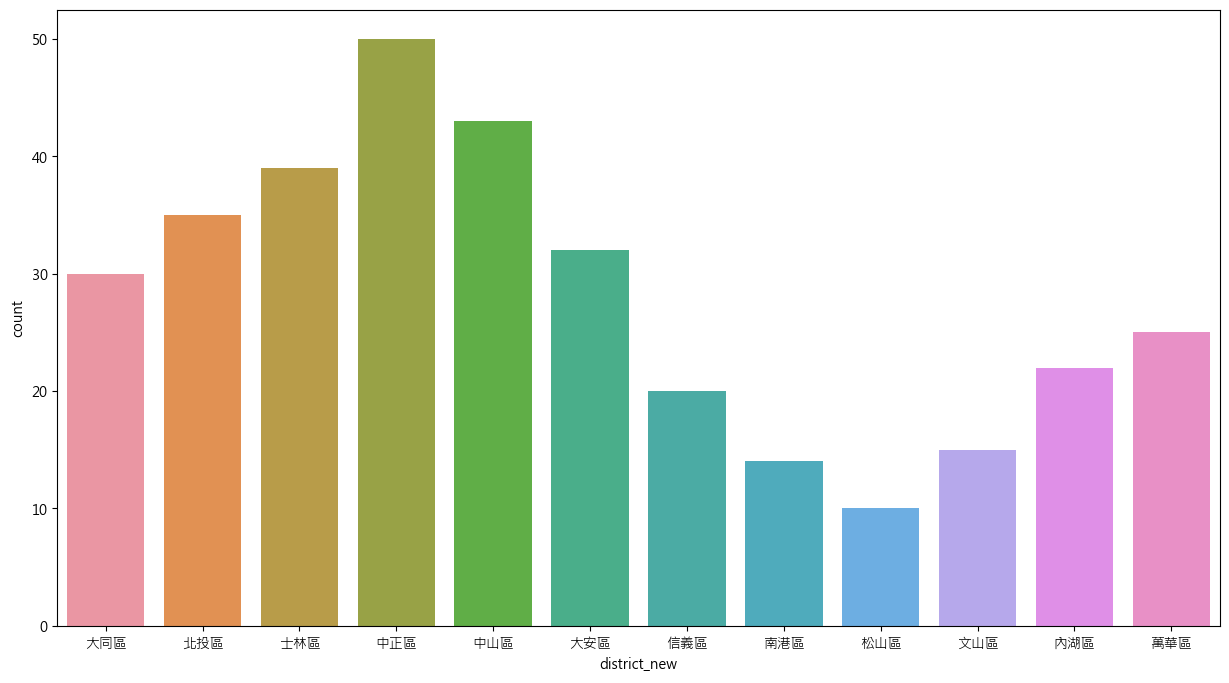

In [26]:
plt.figure(figsize = (15,8))
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
sns.countplot(x=df2["district_new"])

<AxesSubplot:xlabel='total_rating', ylabel='count'>

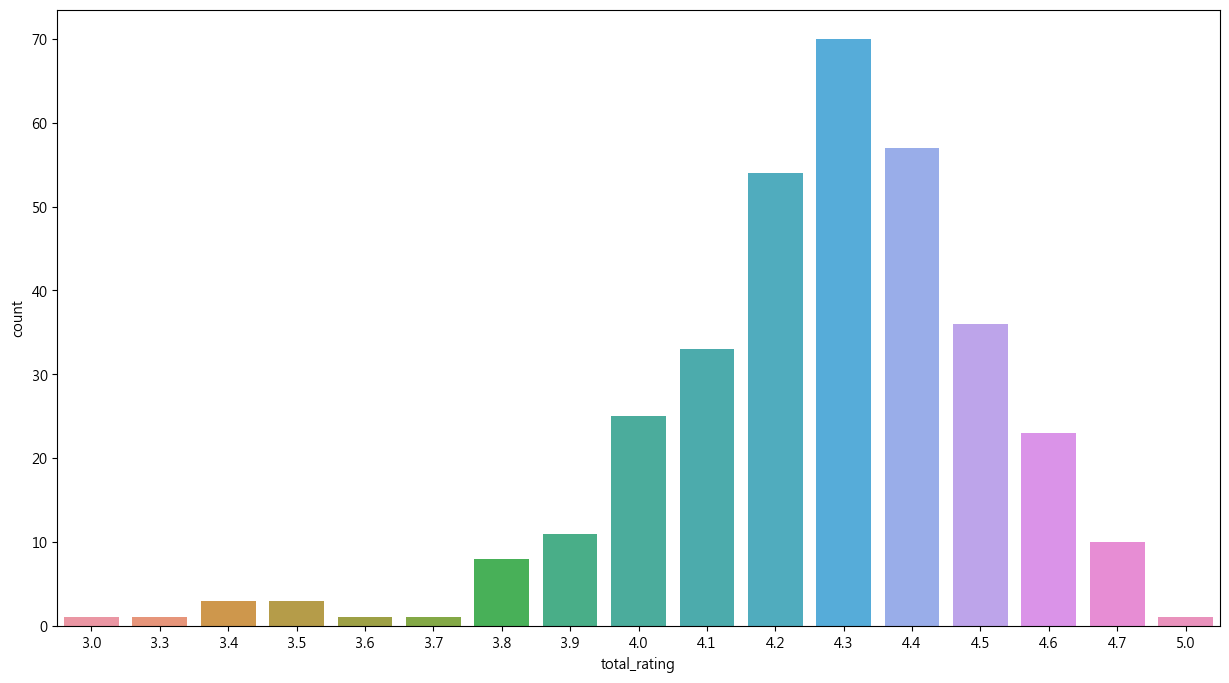

In [29]:
plt.figure(figsize = (15,8))
sns.countplot(x = df2['total_rating'])